In [1]:
from IPython import get_ipython


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# same as % matplotlib inline
# only difference is that vscode sees it like this
get_ipython().run_line_magic('matplotlib', 'inline')


 # In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
 # Nando

In [3]:
df_movies = pd.read_csv('../../data/movie.csv')
df_movies.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


 Laat de kolommen zien waar we mee bezig zijn

In [4]:
print(df_movies.columns)
print("Data length: {}".format(len(df_movies)))


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
Data length: 5043


In [5]:
# Ongewenste kolommen verwijderen
df_movies.drop(["movie_imdb_link", "aspect_ratio"], axis=1, inplace=True)

#Onduidelijke kolomnamen aanpassen
df_movies.rename(columns={'color': 'Colour',
                          'director_name': 'Director',
                          'num_critic_for_reviews': 'Number of critics',
                          'duration': 'Duration',
                          'director_facebook_likes': 'Director FB likes',
                          'actor_3_facebook_likes': 'Actor 3 FB likes',
                          'actor_2_name': 'Actor 2 name',
                          'actor_1_facebook_likes': 'Actor 1 FB likes',
                          'gross': 'Gross',
                          'genres': 'Genres',
                          'actor_1_name': 'Actor 1 name',
                          'movie_title': 'Movie title',
                          'num_voted_users': 'Number of voted users',
                          'cast_total_facebook_likes': 'Total Cast FB likes',
                          'actor_3_name': 'Actor 3 name',
                          'facenumber_in_poster': 'Number of faces on poster',
                          'plot_keywords': 'Plot Keywords',
                          'num_user_for_reviews': 'Number of user reviews',
                          'language': 'Language',
                          'country': 'Country',
                          'content_rating': 'Age rating',
                          'budget': 'Budget',
                          'title_year': 'Release year',
                          'actor_2_facebook_likes': 'Actor 2 FB likes',
                          'imdb_score': 'IMDB Score',
                          'movie_facebook_likes': 'Movie FB likes'}, inplace=True)

# Volgorde kolommen aanpassen
df_movies = df_movies[['Movie title',
                       'Release year',
                       'Director',
                       'Director FB likes',
                       'Gross',
                       'Budget',
                       'Duration',
                       'Language',
                       'Country',
                       'Colour',
                       'Genres',
                       'IMDB Score',
                       'Number of voted users',
                       'Number of critics',
                       'Number of user reviews',
                       'Age rating',
                       'Total Cast FB likes',
                       'Movie FB likes',
                       'Actor 1 name',
                       'Actor 2 name',
                       'Actor 3 name',
                       'Actor 1 FB likes',
                       'Actor 2 FB likes',
                       'Actor 3 FB likes',
                       'Plot Keywords',
                       'Number of faces on poster',
                       ]]

# Datatypen aanpassen
# 1. Floats omzetten naar integers
#  De dataset bevat geen kolommen die dienen te worden bewaard als float, behalve `IMDB Score`
df_movies_IMDB_Score = df_movies["IMDB Score"]  # Tijdelijke kopie van de kolom `IMDB Score`
df_movies = df_movies.drop('IMDB Score', axis=1).fillna(0).astype(int, errors='ignore') # Waarden omzetten naar integers
df_movies.insert(11, "IMDB Score", df_movies_IMDB_Score)  # `IMDB Score` weer toevoegen aan originele DataFrame
del df_movies_IMDB_Score

# 2. De kolom `Release year` omzettten van integers naar het datetime-datatype
df_movies["Release year"] = pd.to_datetime(df_movies["Release year"], format='%Y', errors='coerce')


# Maak de data schoon

Hier zet ik alle column namen neer die te maken heeft met Facebook of IMDB

Vervolgens drop ik alle NaN values om errors te verkomen.

In [6]:
# Select only the facebook and imdb columns

features = ['Director FB likes', 'Actor 1 FB likes', 
                'Actor 2 FB likes', 'Gross', 'Total Cast FB likes',
                'Actor 3 FB likes', 'IMDB Score', 'Movie FB likes']
df_Q1 = df_movies.copy()[features]

# Remove the data where gross is 0 or Where all record has a NaN value
df_Q1 = df_Q1.dropna()
df_Q1 = df_Q1[df_Q1.Gross != 0]

# Zoeken voor coalities

Dit doe ik door middel van eerst de describe functie aan te roepen dit geeft alle nodige waardes voor die kolom
Daarna Maak ik een coalitie heatmap

In [7]:
df_Q1.describe()

,Director FB likes,Actor 1 FB likes,Actor 2 FB likes,Gross,Total Cast FB likes,Actor 3 FB likes,IMDB Score,Movie FB likes
count,4159.000000,4159.000000,4159.000000,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000
mean,746.621063,7337.022602,1885.322674,4.846841e+07,10882.029574,721.502525,6.469897,8730.617697
std,2945.354788,15045.023266,4367.923272,6.845299e+07,18517.280893,1808.439956,1.052182,20788.260808
min,0.000000,0.000000,0.000000,1.620000e+02,0.000000,0.000000,1.600000,0.000000
25%,10.000000,695.500000,342.000000,5.340988e+06,1736.500000,169.500000,5.900000,0.000000
50%,57.000000,1000.000000,650.000000,2.551750e+07,3697.000000,414.000000,6.600000,182.000000
75%,218.000000,12000.000000,962.000000,6.230944e+07,15561.500000,672.000000,7.200000,10000.000000
max,23000.000000,640000.000000,137000.000000,7.605058e+08,656730.000000,23000.000000,9.300000,349000.000000


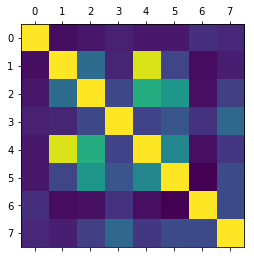

,Director FB likes,Actor 1 FB likes,Actor 2 FB likes,Gross,Total Cast FB likes,Actor 3 FB likes,IMDB Score,Movie FB likes
Director FB likes,1.000000,0.092055,0.119797,0.145044,0.121748,0.121115,0.184650,0.162925
Actor 1 FB likes,0.092055,1.000000,0.392784,0.154745,0.945759,0.255636,0.087851,0.135636
Actor 2 FB likes,0.119797,0.392784,1.000000,0.263073,0.642580,0.555514,0.095136,0.234896
Gross,0.145044,0.154745,0.263073,1.000000,0.247400,0.308461,0.198021,0.378082
Total Cast FB likes,0.121748,0.945759,0.642580,0.247400,1.000000,0.490505,0.098578,0.210184
Actor 3 FB likes,0.121115,0.255636,0.555514,0.308461,0.490505,1.000000,0.058255,0.273537
IMDB Score,0.184650,0.087851,0.095136,0.198021,0.098578,0.058255,1.000000,0.269383
Movie FB likes,0.162925,0.135636,0.234896,0.378082,0.210184,0.273537,0.269383,1.000000


In [8]:
plt.matshow(df_Q1.corr())
plt.show()
df_Q1.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b35da90>,
      dtype=object)

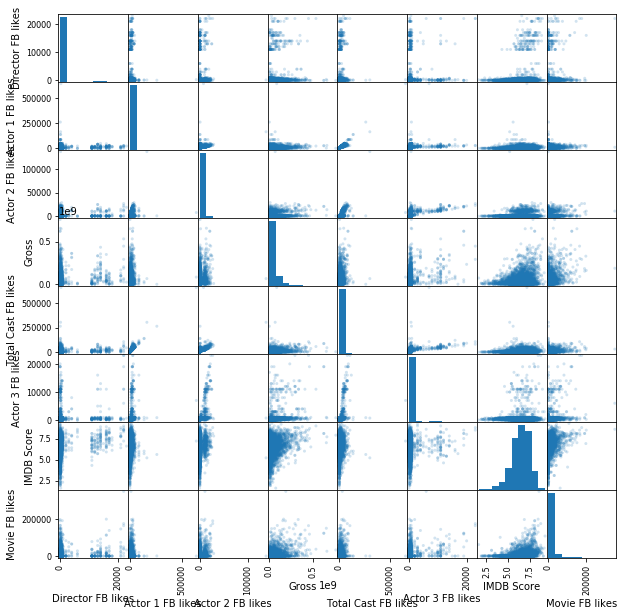

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_Q1, alpha=0.2, figsize=(10, 10))


Als je naar de IMDB score vs de gross kijkt zie je daar een beetje een coalitie in maar veel is dat niet. Veel van de data zit nog steeds op een rechte horizontale lijn waar je niet veel aan hebt. Je ziet hier een sterk verband tussen de Actor 1 FB likes en de total cast FB likes. Dit is ook best logisch omdat de cast onder andere de acteur in zit. Helaas kunnen we die coalitie niet gebruiken om de omzet te voorspellen.

Drop de omzet kolom voor de X as
En gebruik de omzet kolom voor de y as
Zo voorspellen we y met de waarde van X

In [10]:
# Split the data to X and Y
X = df_Q1.drop(columns=['Gross'])
y = df_Q1['Gross']
assert len(X) == len(y) # make sure that the length of x is the same as the length of y



Split de data op in 3 delen, Train data(72%), Test data(20%) en validation Data(8%)
Waarom 8% voor de validation data en 72% voor de Train data dit omdat we eerst de train data pakken waar we daarna weer 10% validatie af halen.

In [11]:
from sklearn.model_selection import train_test_split
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)




# Train onze regressie model

Hier gaan we een LogisticRegression model trainen. Waarom? Omdat een LogisticRegression model meer een bocht in de data kan maken dan een linear regressie. Daarom is dit mijn base test.


In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=1)

LR.fit(X_train, y_train)



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Laten we nu gaan kijken hoe onze model het heeft gedaan.

In [13]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))



RMS: 130044396.49356787
MSE: 1.6911545059376288e+16
Score: 0.013221153846153846


# Optimalisatie
Nu we een base score hebben kunnen we dit optimaliseren. We hebben een best lage base score dus dit kunnen we vast verbeteren

Wat we eerst kunnen doen is de X as te normaliseren zodat we betere data krijgen

In [14]:
from scipy import stats
from sklearn import preprocessing
standardscaler = preprocessing.StandardScaler()
x_scaled = standardscaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled)

Nadat we de X data gescaled hebben door middel van een StandardScaler moeten we dit weer op splitsen naar train, test en validatie sets. Dit doen we weer door dezelfde manier als de vorige keer.

In [15]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)


In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=1)

LR.fit(X_train, y_train)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))


RMS: 83876274.9257036
MSE: 7035229495412215.0
Score: 0.002403846153846154


Dit heeft niet veel geholpen. De score is erg naar beneden. Dit is niet wat we wilden. Ook is de Mean squared error flink naar beneden gegaan wat weer wat positief is. 

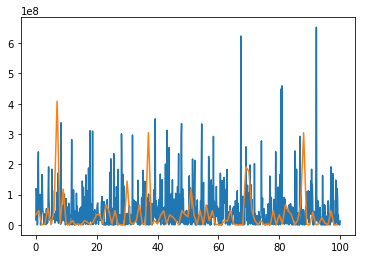

In [18]:
x = np.linspace(0, 100, len(y_test))
plt.plot(x,y_test, LR.predict(X_test)[:100])


Hier boven zien we wat de voorspelde omzet was en wat de daadwerkelijk omzet was en dit zo nog te ver van elkaar vanaf.

# Ander model
 We gebruiken nu een logistic regresion model laten we kijken of een ander model beter werkt. We gaan kijken of een linear regressie beter werkt.

In [19]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))


RMS: 55964436.88153042
MSE: 3132018195466802.5
Score: 0.3627979608010119


 Dit is een grote verbetering erg groot zelfs. De score is met zo goed als 36% omhoog gegaan en de mean squared error is er ook beter op geworden. Laten we kijken of we dit nog beter kunnen maken.

Wat we nog kunnen doen is de Y as normaliseren dit konden we niet door voor een logistic regression omdat hij dan een continous error geeft. Maar met een lineair algoritme kunnen we dit prima doen

In [21]:
from scipy import stats
y_scaled = stats.zscore(y)


In [22]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)


In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))


RMS: 0.8176584521504231
MSE: 0.6685653443730257
Score: 0.3627979608010117


 Door het te normalizeren van de y data hebben we nu de mean squared error flink naar beneden gekregen. Maar de score is hetzelfde gebleven

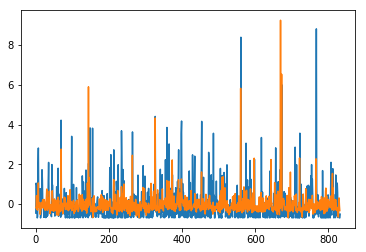

In [25]:
x = np.linspace(0, len(y_test), len(y_test))
plt.plot(x,y_test, LR.predict(X_test))



Nu ziet de plot er ook iets beter uit. Maar nog lang niet bruikbaar

Wat we nog kunnen doen is kijken of polynomialfeatures het verbeteren.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_scaled)

In [27]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_poly, y_scaled, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [28]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))




RMS: 0.8632635375200614
MSE: 0.7452239352116503
Score: 0.2897355282121661


Dit levert ons een lagere score en hogere MSE op. Dit is lager dan onze best gescoorde model dus we gaan terug naar dat model

Wat we nog kunnen proberen is categorieen van de y data maken. Zo kunnen we de z-score afronden op hele getallen en kijken of we in de buurt kunnen komen.

In [122]:
y = df_Q1['Gross']
y_scaled = stats.zscore(y)
y_scaled = y_scaled.round(0)
y_scaled[:100]

array([10.,  4.,  2.,  6.,  0.,  4.,  2.,  6.,  4.,  4.,  2.,  2.,  5.,
        1.,  4.,  1.,  8.,  3.,  2.,  3.,  3.,  1.,  3.,  0.,  2.,  9.,
        5.,  0.,  9.,  4.,  5.,  5.,  4.,  3.,  3.,  5.,  3.,  3.,  2.,
        2.,  2.,  1.,  5.,  1.,  4.,  2.,  3.,  3.,  0.,  1.,  1.,  1.,
        4.,  4.,  1.,  3.,  1.,  3.,  1.,  2.,  1., -0.,  1.,  4.,  2.,
        7.,  4.,  2.,  4.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  4.,
        5.,  4.,  2.,  3.,  2., -0.,  3.,  3.,  1.,  3.,  2., -1.,  1.,
        2.,  1.,  4.,  2.,  4.,  4.,  1.,  1.,  1.])

In [123]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [124]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))



RMS: 0.9151951425885614
MSE: 0.8375821490176972
Score: 0.3262708473734114


Dit levert ons wel een slechtere score op en een slechtere MSE wat er op neer komt dat dit niet goed werkt.

# Eind resultaat

Zo ziet het er naar uit dat de beste model een lineaire regressie met de y waarden genormaliseerd met de z-score. Deze is niet afgerond naar een bepaald bedrag en is de X waarden genormaliseerd door een standardscaler. Deze model levert een score op van 19% en een MSE van 0.70 afgerond.

In [116]:
y = df_Q1['Gross']
y_scaled = stats.zscore(y)

In [117]:
# Create Train test and validation Split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=1)
# Doing it twice because you need a validation set as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [118]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test score

In [119]:
mse = mean_squared_error(y_test, LR.predict(X_test))
rms = math.sqrt(mse)
score = LR.score(X_test, y_test)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))



RMS: 0.8176584521504231
MSE: 0.6685653443730257
Score: 0.3627979608010117


# Validation score

In [120]:
mse = mean_squared_error(y_val, LR.predict(X_val))
rms = math.sqrt(mse)
score = LR.score(X_val, y_val)

print("RMS: {}".format(rms))
print("MSE: {}".format(mse))
print("Score: {}".format(score))
print("Std: {}".format( df_Q1.Gross.std()))

RMS: 0.835343609306829
MSE: 0.6977989456097602
Score: 0.19843163101434147
Std: 68452990.43875284


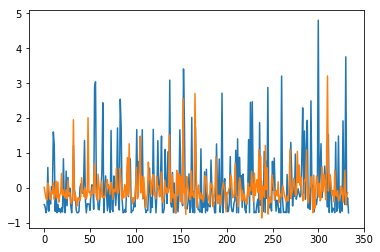

In [121]:
x = np.linspace(0, len(y_val), len(y_val))
plt.plot(x,y_val, LR.predict(X_val))

Als je kijkt naar de grafiek van de voorspelde waarde(oranje) vs de daadwerkelijke waarde(blauw) merk je dat hij er flink naast zit.

 # In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
 
 Dit is bijna niet te doen. Dit omdat er zit weinig tot geen zichtbare coalitie tussen de omzet en populariteit op Facebook en IMDB. Ook is de minder zichtbare coalitie's weinig tot geen waardoor de modelen laag scoren